In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [157]:
import sys
print(sys.executable)
print(sys.version)

c:\Users\Asty\anaconda3\python.exe
3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]


In [158]:
!pip install niapy

In [159]:
import niapy
print(dir(niapy.algorithms.basic))

['AgingNpDifferentialEvolution', 'ArtificialBeeColonyAlgorithm', 'BacterialForagingOptimization', 'BareBonesFireworksAlgorithm', 'BatAlgorithm', 'BeesAlgorithm', 'CamelAlgorithm', 'CatSwarmOptimization', 'CenterParticleSwarmOptimization', 'ClonalSelectionAlgorithm', 'ComprehensiveLearningParticleSwarmOptimizer', 'CoralReefsOptimization', 'CuckooSearch', 'DifferentialEvolution', 'DynNpDifferentialEvolution', 'DynNpMultiStrategyDifferentialEvolution', 'DynamicFireworksAlgorithm', 'DynamicFireworksAlgorithmGauss', 'EnhancedFireworksAlgorithm', 'EvolutionStrategy1p1', 'EvolutionStrategyML', 'EvolutionStrategyMp1', 'EvolutionStrategyMpL', 'FireflyAlgorithm', 'FireworksAlgorithm', 'FishSchoolSearch', 'FlowerPollinationAlgorithm', 'ForestOptimizationAlgorithm', 'GeneticAlgorithm', 'GlowwormSwarmOptimization', 'GlowwormSwarmOptimizationV1', 'GlowwormSwarmOptimizationV2', 'GlowwormSwarmOptimizationV3', 'GravitationalSearchAlgorithm', 'GreyWolfOptimizer', 'HarmonySearch', 'HarmonySearchV1', 'Har

In [160]:
X_train.dtypes

Total_MET                   float64
Avg_METs                    float64
TrackerDistance             float64
TotalDistance               float64
DistancePerStep             float64
StepsbyDistance             float64
TotalActiveDistance         float64
TotalSteps                  float64
TotalActiveMinutes          float64
AverageActiveMinutes        float64
ActiveRatio                 float64
DistanceIntensity           float64
InactiveRatio               float64
SedentaryMinutes            float64
SedentaryRatio              float64
ActivityRank                float64
LightlyActiveMinutes        float64
VeryActiveMinutes           float64
LightActiveDistance         float64
LightlyActiveRatio          float64
ActiveGroup                 float64
AveragePace                 float64
VeryActiveRatio             float64
VeryActiveDistance          float64
ActiveDistanceRatio         float64
FairlyActiveMinutes         float64
FairlyActiveRatio           float64
TotalUsageMinutes           

# Read Data

In [161]:
train = pd.read_csv('../Dataset/FitbitTrainDataFixed.csv')
test = pd.read_csv('../Dataset/FitbitTestDataFixed.csv')

In [162]:
X_train = train.drop(columns=['Calories'])
y_train = train['Calories']
X_test = test.drop(columns=['Calories'])
y_test = test['Calories']

# Import Libraries

In [163]:
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold
from niapy.algorithms.basic import ParticleSwarmOptimization
from niapy.problems import Problem
from niapy.task import Task
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, TheilSenRegressor, HuberRegressor, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor


# Function Evaluate Model

In [164]:
def evaluate_model(model_class, model_name, selected_features):
    """Evaluate the model and plot results."""
    model = model_class()  # Inisialisasi model
    model.fit(X_train.iloc[:, selected_features], y_train)  # Fit model pada data latih

    # Prediksi
    y_train_pred = model.predict(X_train.iloc[:, selected_features])
    y_test_pred = model.predict(X_test.iloc[:, selected_features])

    # Hitung metrik
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    # Mengumpulkan hasil ke dalam dictionary
    # Mengumpulkan hasil ke dalam dictionary


    # Plotting results
    plt.figure(figsize=(10, 10))

    # Residuals vs Predicted Values (Train)
    plt.subplot(2, 2, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')

    # Residuals vs Predicted Values (Test)
    plt.subplot(2, 2, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')

    # Actual vs Predicted Values (Train)
    plt.subplot(2, 2, 3)
    plt.scatter(y_train, y_train_pred, color='purple', alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Diagonal line
    plt.title('Actual vs Predicted Values (Train)')
    plt.xlabel('Actual Values (Train)')
    plt.ylabel('Predicted Values (Train)')

    # Actual vs Predicted Values (Test)
    plt.subplot(2, 2, 4)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values (Test)')
    plt.ylabel('Predicted Values (Test)')

    plt.tight_layout()
    plt.show()

    return{
        'Model': model_name,
        'RMSE Train': np.sqrt(mse_train),
        'RMSE Test': np.sqrt(mse_test),
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test,
        'Residuals Train': residuals_train,  # Menyimpan residuals
        'Residuals Test': residuals_test       # Menyimpan residuals
    }

# Feature Selection menggunakan PSO

In [165]:
class FeatureSelection(Problem):
    def __init__(self, X_train, y_train, model_class, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.model_class = model_class
        self.alpha = alpha

    def _evaluate(self, x):
        # x = np.array(x)  # Pastikan x adalah array NumPy
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0  # Return high value if no feature is selected

        model = self.model_class()
        scores = cross_val_score(model, self.X_train.iloc[:, selected], self.y_train, cv=3, scoring='neg_mean_squared_error').mean()
        mse = -scores.mean()  # MSE from cross-validation
        rmse = np.sqrt(mse)

        # Fit the model for metrics calculation
        model.fit(self.X_train.iloc[:, selected], self.y_train)
        y_pred = model.predict(self.X_train.iloc[:, selected])
        
        r2 = r2_score(self.y_train, y_pred)
        mae = mean_absolute_error(self.y_train, y_pred)
        mape = mean_absolute_percentage_error(self.y_train, y_pred)

        return self.alpha * mse + (1 - self.alpha) * (num_selected / self.X_train.shape[1])
        # return score, rmse, r2, mae, mape  # Return multiple metrics

def feature_selection_pso(X_train, y_train, model_class):
    """Perform feature selection using Particle Swarm Optimization."""
    problem = FeatureSelection(X_train, y_train, model_class)
    task = Task(problem, max_iters=50)

    # Initialize PSO
    optimizer = ParticleSwarmOptimization(population_size=10,seed=1234)

    # Run optimization
    best_features, best_fitness = optimizer.run(task)
    selected_features = np.where(best_features > 0.5)[0]
    return selected_features,best_fitness #np.where(best_features > 0.5)[0], 
            

# Machine Learning

In [166]:
feature_names = list(X_train.columns)

In [167]:
results = []

## Lasso

In [168]:
selected_features, best_fitness = feature_selection_pso(X_train, y_train, Lasso)

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.681e+06, tolerance: 2.597e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+06, tolerance: 2.439e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.494e+06, tolerance: 

In [169]:
print('Number of selected features:', len(selected_features))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features]))

Number of selected features: 15
Selected features: Total_MET, TotalDistance, StepsbyDistance, TotalActiveDistance, TotalSteps, TotalActiveMinutes, AverageActiveMinutes, SedentaryRatio, VeryActiveMinutes, LightActiveDistance, VeryActiveRatio, VeryActiveDistance, ActiveDistanceRatio, FairlyActiveRatio, ModeratelyActiveDistance


c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.167e+06, tolerance: 3.766e+04
  model = cd_fast.enet_coordinate_descent(


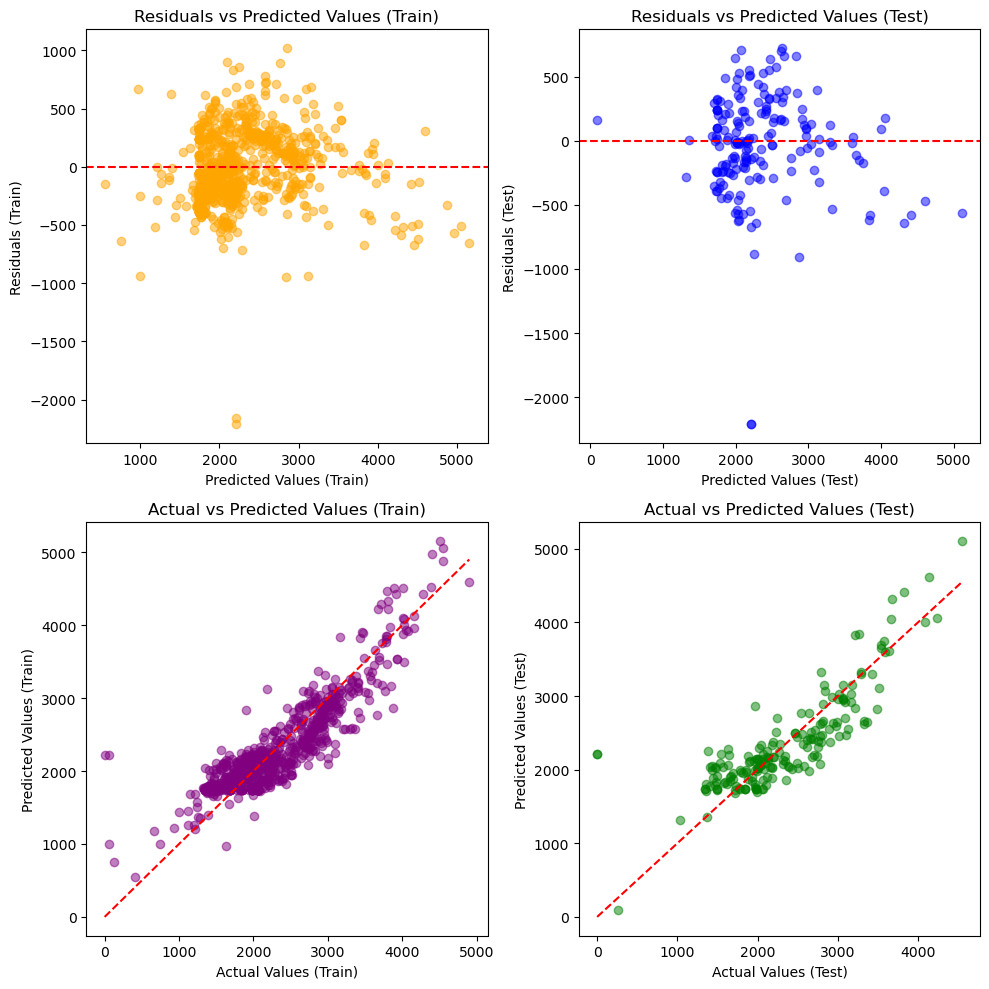

In [170]:
lasso_results = evaluate_model(Lasso, 'Lasso', selected_features)
results.append(lasso_results)

In [171]:
pd.set_option('display.float_format', '{:.2f}'.format)

pd.DataFrame(results)

,Model,RMSE Train,RMSE Test,R2 Train,R2 Test,MAE Train,MAE Test,MAPE Train,MAPE Test,Residuals Train,Residuals Test
0,Lasso,320.85,403.15,0.79,0.70,250.24,286.39,13272247839754456.00,106036788592080816.00,0 -38.08 1 888.63 2 307.77 3 ...,0 -215.45 1 529.53 2 313.19 3 ...
